<h1 style="color:green">Homework 11 </h1>

In [79]:
import os
import pandas as pd
cwd= os.getcwd()
path = os.path.join(cwd,'data')

In [80]:
def get_train_set():
    print ('loading provided train set.')
    fp = os.path.join(path,'train.csv')
    df_train = pd.read_csv(fp, encoding='ISO-8859-1',low_memory=False) 
    return df_train


df_train= get_train_set ()
df_train.head()


loading provided train set.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
def get_test_set():    
    print ('loading provided test set .')
    fp = os.path.join(path,'test.csv')
    df_test = pd.read_csv(fp, encoding = 'ISO-8859-1', low_memory = False)
    df_test.sort_values(by=['PassengerId'], ascending=False)
    return df_test

df_test= get_test_set ()
df_test.head()

loading provided test set .


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
def clean_blank_target(df):
    print ('cleaning blank target.')
    print ('Len before cleaning= {:,}'.format(len(df)))
    df = df.dropna(subset=['Survived'])
    print ('Len after cleaning= {:,}'.format(len(df)))
    return df


df_train= clean_blank_target(df_train)

cleaning blank target.
Len before cleaning= 668
Len after cleaning= 668


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [122]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [123]:
from sklearn.ensemble import RandomForestClassifier

y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
495,496,0
648,649,0
278,279,0
31,32,1
255,256,1
...,...,...
167,168,0
306,307,1
379,380,0
742,743,1


In [124]:
X_test.dtypes

Pclass        int64
SibSp         int64
Parch         int64
Sex_female     bool
Sex_male       bool
dtype: object

In [125]:
from sklearn.preprocessing import LabelEncoder

def label_encode_safe(X_train, X_test):
    for col in X_train.columns:
        if X_train[col].dtype == 'object':
            X_train[col] = X_train[col].astype(str)
            X_test[col] = X_test[col].astype(str)

            le = LabelEncoder()
            X_train_vals = list(X_train[col].unique()) + ['unknown']
            le.fit(X_train_vals)

            X_train[col] = le.transform(X_train[col])
            X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else 'unknown')
            X_test[col] = le.transform(X_test[col])
    return X_train, X_test


In [126]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
    print('normalizing.')
    numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
    X_test_scaled = scaler.transform(X_test[numeric_cols])
    
    return X_train_scaled, X_test_scaled

In [127]:
def run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test=None, list_classifiers= None):
    if list_classifiers is None or 'LogisticRegression' in list_classifiers:
        print ('\nLogisticRegression.')
        clf = LogisticRegression(max_iter=10000)
        grid_values = {'C': [0.005, 0.01,0.1, 1, 100, 10000, 100000]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled,  y_train,  y_test= y_test)

    if list_classifiers is None or 'DecisionTreeClassifier' in list_classifiers:
        print ('\nDecisionTreeClassifier')
        clf = DecisionTreeClassifier()       
        grid_values = {'max_depth': [2,5,7, 20, 50]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'RandomForestClassifier' in list_classifiers:
        print ('\nRandomForestClassifier.')
        clf = RandomForestClassifier()       
        grid_values = {'n_estimators': [20,50]} #,200,300]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_poly' in list_classifiers:
        print ('\nSVC_poly')
        clf = SVC(kernel='poly')           
        grid_values = {'C': [0.01]}# , 0.1, 1, 100, ]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_rbf' in list_classifiers:
        print ('\nSVC_rbf')
        clf = SVC(kernel='rbf')
        grid_values = {'C': [0.005, 0.01]}# , 0.02, 0.03, 0.1, 1, 100, 10000], 'gamma':[0.001, 0.01, 0.1]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'NB' in list_classifiers:
        print ('\nNB')
        clf =  GaussianNB().fit(X_train_scaled, y_train)
        train_f1 = f1_score(y_train, clf.predict(X_train_scaled))
        print("train set f1= {}".format(train_f1))
        if not y_test is None:
            test_f1 = f1_score(y_test, clf.predict(X_test_scaled))
            print("train set f1= {}".format(test_f1))

            
    if list_classifiers is None or 'GradientBoostingClassifier' in list_classifiers:
        print ('\nGradientBoostingClassifier.')
        clf = GradientBoostingClassifier() # learning_rate = 0.03)       
        grid_values = {'max_depth': [3,5,7]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'MLP' in list_classifiers:
        print ('\nMLP.')
        clf = MLPClassifier(hidden_layer_sizes = [50]) #, 100])
        grid_values = {'alpha' : [0.001, 0.01, 0.1, 1, 10]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'xgboost' in list_classifiers:
        print ('\nxgboost.')
        clf = XGBClassifier().fit(X_train_scaled, y_train)
        y_predicted = clf.predict(X_test_scaled)
        print ('f1_score  = {:.2}'.format(f1_score(y_test, y_predicted)))

In [128]:
def get_X_train_test(df_train, df_test): 
    print ('Extracting features.')
    cols_to_keep= [
        'PassengerId',	'Pclass', 'Name',	'Sex',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare',	'Cabin',	'Embarked']
    X_train = df_train[cols_to_keep]
    X_test = df_test[cols_to_keep]
    return X_train, X_test, cols_to_keep

X_train, X_test, features  = get_X_train_test(df_train, df_test)

y_train = df_train['Survived']

X_train.shape

Extracting features.


(668, 11)

In [129]:
columns_to_encode = ['Name','Sex']
def label_encoder_safe(X_train, X_test):
    for col in X_train.columns:
        if X_train[col].dtype == 'object':
            le = LabelEncoder()
            le.fit(X_train[col].astype(str))  # Тренуємо тільки на train
            X_train[col] = le.transform(X_train[col].astype(str))
            
            known_classes = set(le.classes_)
            X_test[col] = X_test[col].astype(str).apply(lambda x: le.transform([x])[0] if x in known_classes else -1)
    return X_train, X_test
X_train,X_test= label_encoder_safe(X_train,X_test)
X_train.dtypes

C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.transform(X_train[col].astype(str))
C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype(str).apply(lambda x: le.transform([x])[0] if x in known_classes else -1)
C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

PassengerId      int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [130]:
def fill_na(df):
    print ('filling NaN...')
    for col in list(df):
        if df[col].isna().any():
            df[col]= df[col].fillna(0)

fill_na(X_train)
fill_na(X_test)
# check after fillna 
X_train.isna().any().any(), X_test.isna().any().any()

filling NaN...
filling NaN...


C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\4027551350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= df[col].fillna(0)


(False, False)

In [131]:
from sklearn.model_selection import train_test_split


In [132]:
def apply_preprocessing(df_train, df_test):

    df_train= clean_blank_target(df_train)
    y_train = df_train['Survived']
    if 'Survived' in list(df_test):    
        df_test= clean_blank_target(df_test)
        y_test = df_test['Survived'] # test set  as outcome of train_test_split of provided train set  
    else: 
        y_test = None # provided test set 

    X_train, X_test, features  = get_X_train_test(df_train, df_test)

    X_train,X_test= label_encoder_safe(X_train,X_test)

   
    fill_na(X_train)
    fill_na(X_test)

    X_train_scaled, X_test_scaled  = normalize(X_train, X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, features


In [133]:
df= get_train_set ()
df_train, df_test = train_test_split(df, random_state= 0)
X_train_scaled, X_test_scaled, y_train, y_test, features = apply_preprocessing(df_train, df_test)

print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled.shape, X_test_scaled.shape))
print ('y_train set shape= {}\ny_test set shape= {}'.format(y_train.shape, y_test.shape))

loading provided train set.
cleaning blank target.
Len before cleaning= 668
Len after cleaning= 668
cleaning blank target.
Len before cleaning= 223
Len after cleaning= 223
Extracting features.


C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.transform(X_train[col].astype(str))
C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype(str).apply(lambda x: le.transform([x])[0] if x in known_classes else -1)
C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

filling NaN...
filling NaN...
normalizing.
X_train_scaled shape= (668, 6)
X_test_scaled shape= (223, 6)
y_train set shape= (668,)
y_test set shape= (223,)


C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype(str).apply(lambda x: le.transform([x])[0] if x in known_classes else -1)
C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.transform(X_train[col].astype(str))
C:\Users\tetia\AppData\Local\Temp\ipykernel_11536\611237904.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

In [134]:
from sklearn import tree
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
features = numeric_cols

train accuracy= 99.401%


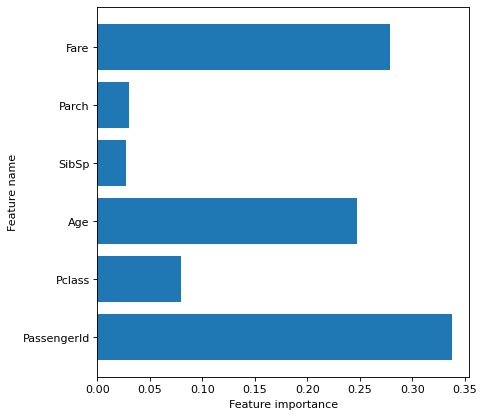

In [135]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=0,
    max_depth=20,
).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
plot_feature_importances(clf, features)

